<a href="https://colab.research.google.com/github/SaiNagaBandaru/Sainaga_606/blob/main/Project_update_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [413]:
import numpy as np 
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, lars_path
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve,f1_score, roc_auc_score, roc_curve, log_loss,classification_report

     

In [414]:
df= pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv.xls")
     

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [415]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [417]:
rows = len(df.axes[0])
cols = len(df.axes[1])
rows


614

In [418]:
cols

13

In [419]:
df.duplicated().sum()

0

In [420]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [421]:
#dropping unwanted columns
df1 = df.drop(['Loan_ID'],axis=1)

In [422]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [423]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [429]:
newdf = df1.dropna()
newdf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [451]:
#creating dummy variables for categorical variables

train = pd.get_dummies(newdf,columns=['Gender', 'Married', 'Self_Employed', 'Credit_History', 'Loan_Status'],drop_first=True)
train


,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Gender_Male,Married_Yes,Self_Employed_Yes,Credit_History_1.0,Loan_Status_Y
1,1,Graduate,4583,1508.0,128.0,360.0,Rural,1,1,0,1,0
2,0,Graduate,3000,0.0,66.0,360.0,Urban,1,1,1,1,1
3,0,Not Graduate,2583,2358.0,120.0,360.0,Urban,1,1,0,1,1
4,0,Graduate,6000,0.0,141.0,360.0,Urban,1,0,0,1,1
5,2,Graduate,5417,4196.0,267.0,360.0,Urban,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,Graduate,2900,0.0,71.0,360.0,Rural,0,0,0,1,1
610,3+,Graduate,4106,0.0,40.0,180.0,Rural,1,1,0,1,1
611,1,Graduate,8072,240.0,253.0,360.0,Urban,1,1,0,1,1
612,2,Graduate,7583,0.0,187.0,360.0,Urban,1,1,0,1,1


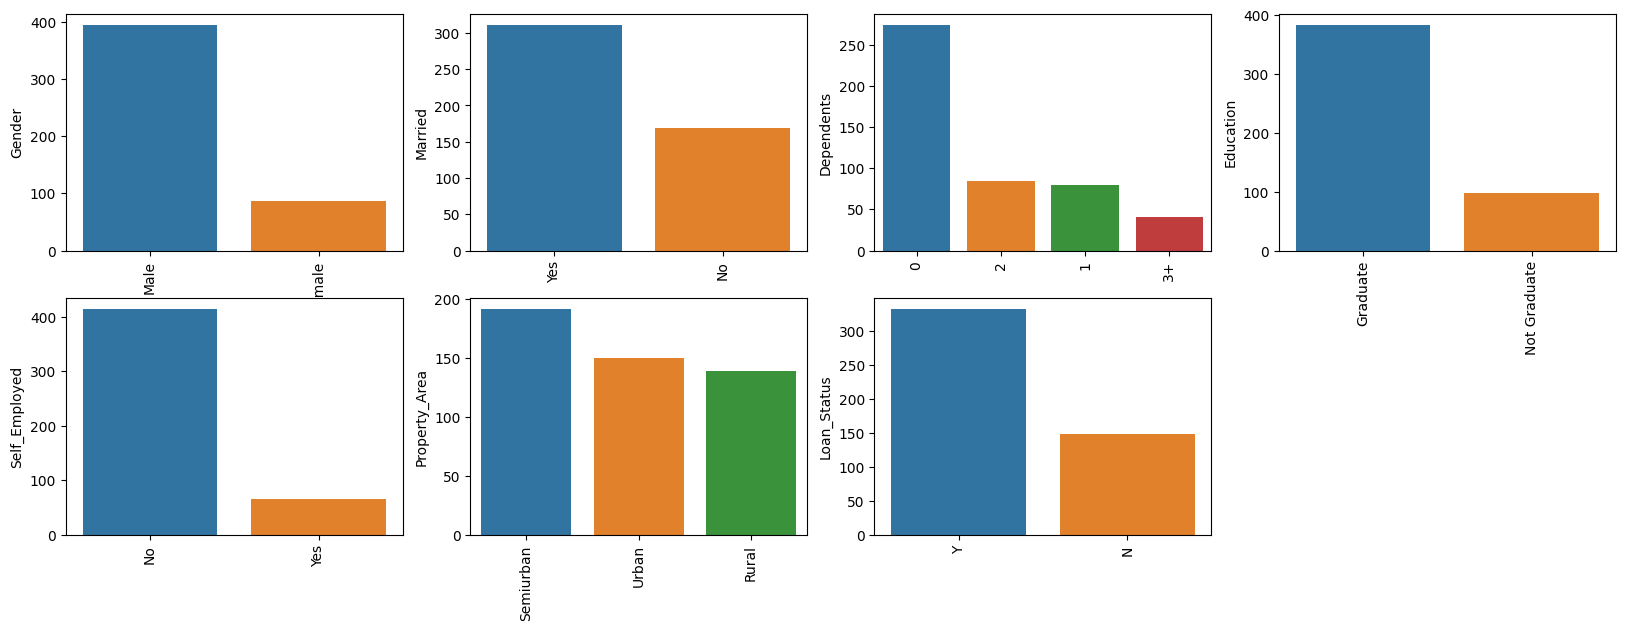

In [461]:
#Visualizing unique values in columns
object = (newdf.dtypes == 'object')
object_cols = list(object[object].index)
plt.figure(figsize=(20,40))
index = 1
  
for col in object_cols:
  y = newdf[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [462]:
newdf.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [463]:
newdf.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Univariate Analysis(Target Variable)

In [464]:
newdf['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

<Axes: ylabel='Loan_Status'>

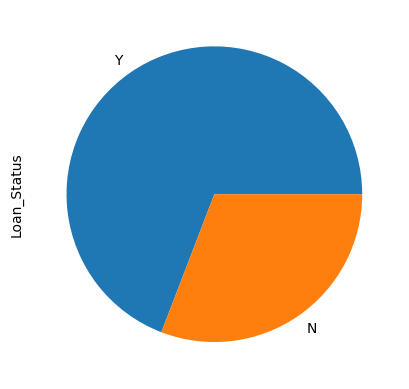

In [465]:
newdf['Loan_Status'].value_counts().plot.pie()

### Categorical variable

<Axes: xlabel='Gender', ylabel='Count'>

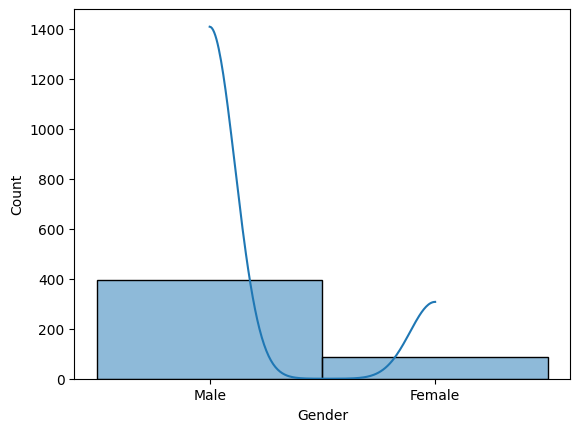

In [466]:

sns.histplot(newdf.Gender,kde=True)
 


<Axes: title={'center': 'Marital Status'}, ylabel='Married'>

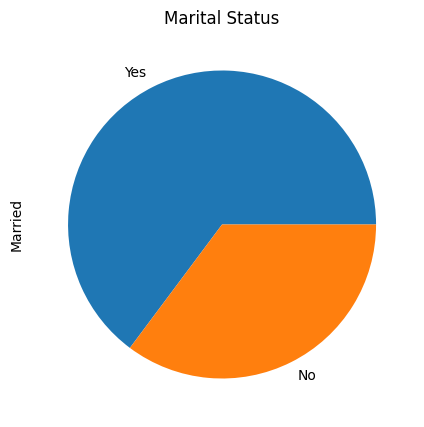

In [467]:
newdf['Married'].value_counts(normalize=True).plot.pie(figsize=(10,5), title= 'Marital Status') 
 


<Axes: title={'center': 'Employement Status'}>

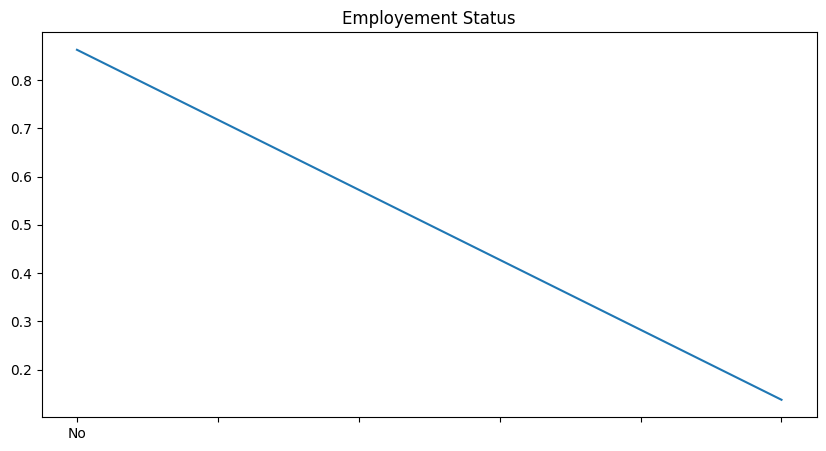

In [468]:
newdf['Self_Employed'].value_counts(normalize=True).plot.line(figsize=(10,5), title= 'Employement Status') 
 

<Axes: title={'center': 'Credit History'}>

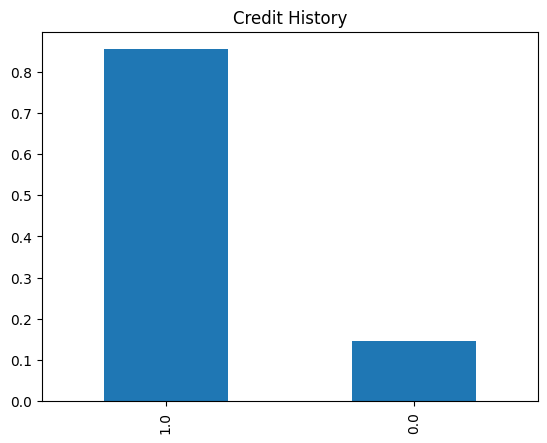

In [469]:
newdf['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit History') 

### Independent and Numerical Variables

<Axes: title={'center': 'Dependents'}, ylabel='Dependents'>

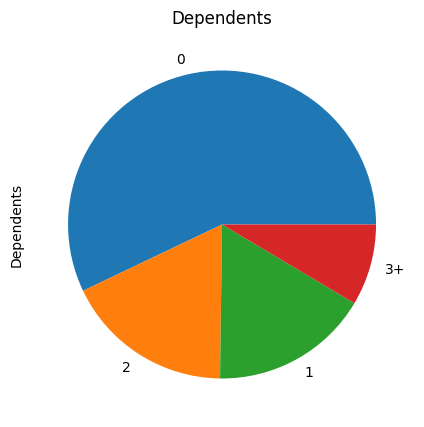

In [470]:
newdf['Dependents'].value_counts(normalize=True).plot.pie(figsize=(10,5), title= 'Dependents') 
 

<Axes: title={'center': 'Education'}>

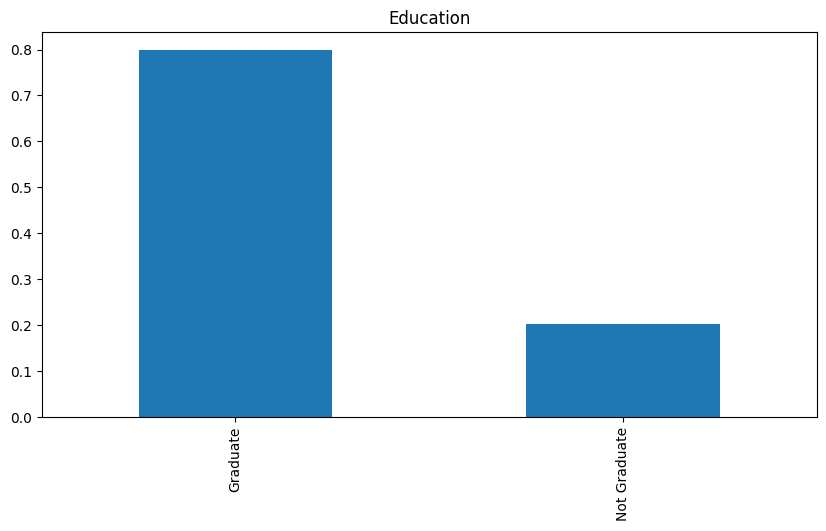

In [471]:
newdf['Education'].value_counts(normalize=True).plot.bar(figsize=(10,5), title= 'Education') 
 

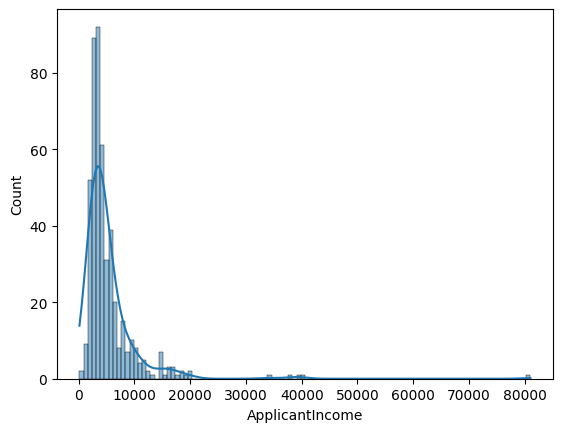

In [472]:
#numericalVariable
sns.histplot(data=newdf['ApplicantIncome'], kde=True);

### Bivariate Analysis

<Axes: xlabel='Loan_Status'>

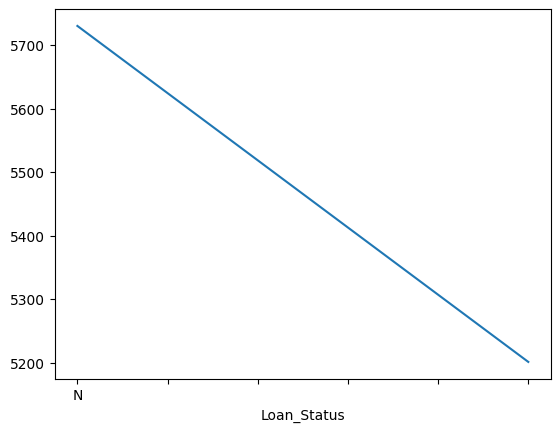

In [473]:
newdf.groupby('Loan_Status')['ApplicantIncome'].mean().plot.line()

<Axes: xlabel='Loan_Status'>

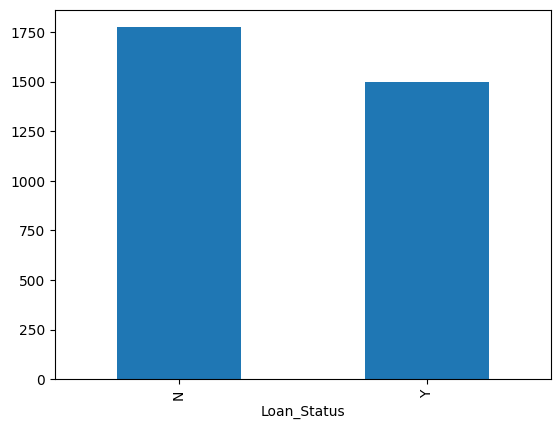

In [474]:
newdf.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()

<Axes: ylabel='Credit_History'>

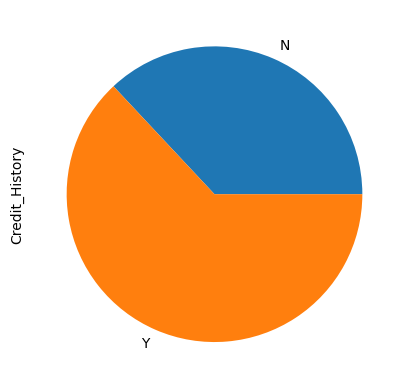

In [475]:
newdf.groupby('Loan_Status')['Credit_History'].mean().plot.pie()

In [476]:
y = newdf.Loan_Status
X = newdf.drop('Loan_Status',1) 


<ipython-input-476-1ccbc8c21e44>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = newdf.drop('Loan_Status',1)


In [478]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 


In [479]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [481]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [487]:
model = LogisticRegression() 
model.fit(x_train, y_train)
model

LogisticRegression()

In [488]:
predicted_cv = model.predict(x_cv)

In [489]:
accuracy_score(y_cv,predicted_cv)

0.8194444444444444

#### Reference: https://realpython.com/logistic-regression-python/